In [19]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from collections import defaultdict
from pprint import pprint
import pandas as pd
import itertools

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

# load data & plot in notebook

In [20]:
file = '/vol01/active_projects/anthony/fhd_p4_eeg_pheno_v4_beta.csv'
arr_noshape = np.loadtxt(open(file, 'rb'),delimiter=",")

freqs = ['Low theta', 'High theta', 'Low alpha', 'High alpha',
        'Low beta', 'Mid beta', 'High beta']
chans = ['FP1-F3', 'FP2-F4', 'FP1-F7', 'FP2-F8', 'F7-F3',
         'F8-F4', 'F7-T7', 'F8-T8', 'F3-C3', 'F4-C4', 'FZ-CZ',
         'CZ-PZ', 'T7-C3', 'T8-C4', 'T7-P7', 'T8-P8', 'C3-P3', 'C4-P4',
         'P7-P3', 'P8-P4', 'P7-O1', 'P8-O2', 'P3-O1', 'P4-O2', 'PZ-O1',
         'PZ-O2', 'O1-O2', 'CZ-C3', 'CZ-C4', 'PZ-P3', 'PZ-P4', 'F7-C3',
         'F8-C4', 'FP1-FP2', 'F3-FZ', 'FZ-F4']

# set up ages on x axis at intervals of .2 from 12-31 
xaxis = []
count = 11.8
for i in range(96):
    count += float(.2)
    xaxis.append(round(count,2))
    
xaxis_arr = np.array(xaxis)

arr = arr_noshape.reshape(7,36,6,96)

#### create a new channel order

In [21]:
new_order = ['FP1-F3','FP1-FP2', 'FP1-F7','F7-F3', 'FP2-F4','FP2-F8',
             'F7-T7', 'F3-FZ', 'F3-C3', 'FZ-CZ', 'FZ-F4', 'F8-F4',
             'F7-C3', 'CZ-C3', 'CZ-C4','F8-C4', 'F8-T8','F4-C4',
             'T7-C3', 'C3-P3', 'CZ-PZ', 'C4-P4', 'T8-C4', 'T8-P8',
             'T7-P7','PZ-P3', 'P7-P3', 'PZ-P4', 'P8-P4', 'P8-O2',
             'P3-O1', 'P7-O1', 'PZ-O1', 'PZ-O2', 'P4-O2','O1-O2']

#### use this to re-organize 2nd dimension (channel names) of 4D array to any order --- ONLY WORKS FOR ONE FREQUENCY AT A TIME

In [22]:
# execute only this cell 
def query_num(tup_orig, channel):
    return str([i[0] for i in tup_orig if channel in i[1]]).replace('[', '').replace(']', '').replace("'", '')
    #return [(i[0], i[1]) for i in tup_orig if channel in i[1]]
    
def remap_channels(array, tup_orig_idx, new_chan_order, frequency_int):
    
    new_order_withnums = []
    for idx, i in enumerate(new_chan_order):
        tup = idx, i, query_num(tup_orig_idx, i)
        data = idx, tup[2]
        new_order_withnums.append(data)
        
    ar = array[frequency_int]
    only_new = [int(i[1]) for i in new_order_withnums]
    return ar[only_new]

In [23]:
nums = [i for i in range(36)]
tup_orig = list(zip(nums, chans))

low_theta_new_arr = remap_channels(arr, tup_orig, new_order, 0)
high_theta_new_arr = remap_channels(arr, tup_orig, new_order, 1)
low_alpha_new_arr = remap_channels(arr, tup_orig, new_order, 2)
high_alpha_new_arr = remap_channels(arr, tup_orig, new_order, 3)
low_beta_new_arr = remap_channels(arr, tup_orig, new_order, 4)
mid_beta_new_arr = remap_channels(arr, tup_orig, new_order, 5)
high_beta_new_arr = remap_channels(arr, tup_orig, new_order, 6)

#### as a test to make sure new channel names were mapped correctly, compare waveforms of old order of plots to new channel order

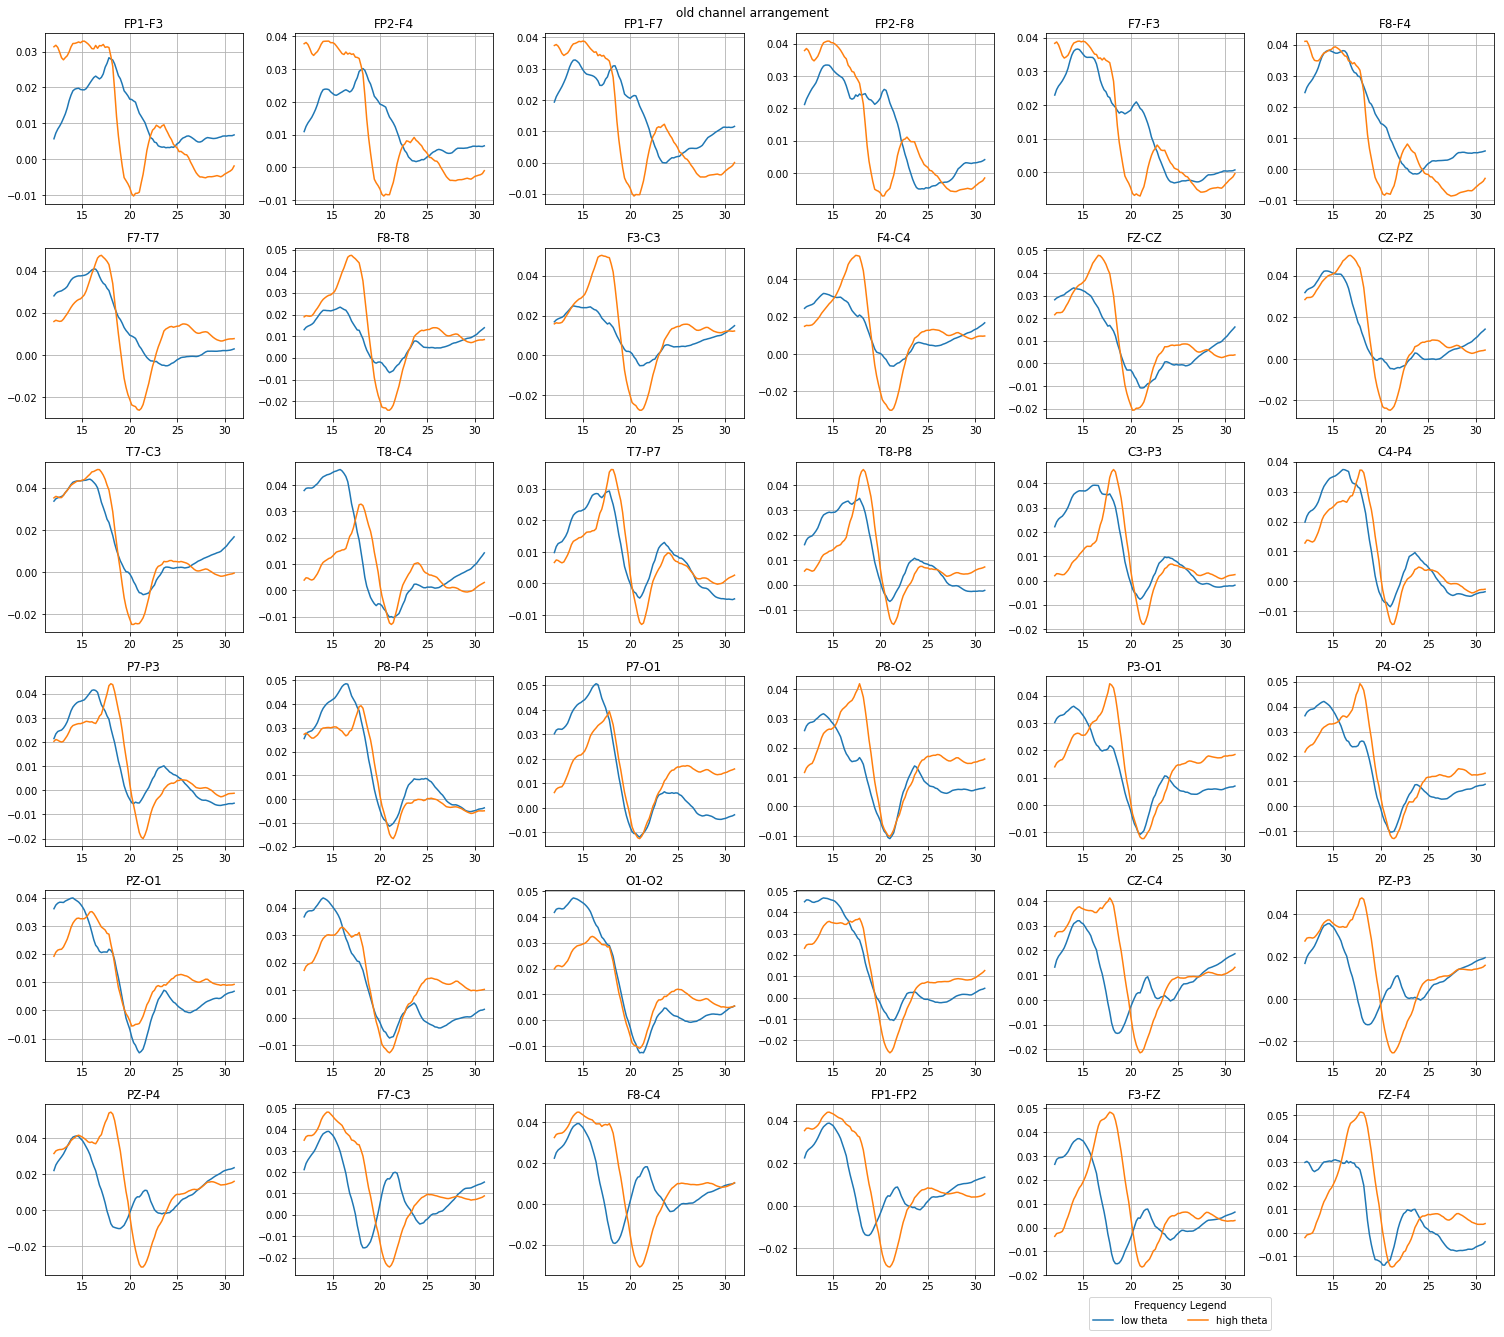

In [6]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(21,18)) #figsize=(18,15)

with PdfPages('test_old_theta.pdf') as pdf:


    for idx, ax in enumerate(axes.flatten()):

        #ax.set_xlim(11.5,31.5)
        #ax.set_ylim(0.067, -0.034)
        fig.suptitle('Male-Female Differences - Resting EEG - alpha band', y=1)

        ax.grid()
        ax.plot(xaxis_arr, arr[0][idx][2], label='low theta')
        ax.plot(xaxis_arr, arr[1][idx][2], label='high theta')
        #ax.plot(xaxis_arr, arr[2][idx][2], label='low alpha')
        #ax.plot(xaxis_arr, arr[3][idx][2], label='high alpha')
        #ax.plot(xaxis_arr, arr[4][idx][2], label='low beta')
        #ax.plot(xaxis_arr, arr[5][idx][2], label='mid beta')
        #ax.plot(xaxis_arr, arr[6][idx][2], label='high beta')
        


        #ax.invert_yaxis()  # invert works
        fig.tight_layout() # automatically adjusts spacing b/t plots 


        #fig.subplots_adjust(hspace=.5)  # horozontial spacing b/t plots 
        #fig.subplots_adjust(wspace=.5)  # vertical spacing b/t plots 
        #ax.set_position([0.1,0.1,0.5,0.8])
        #ax.get_position()
        #plt.gcf().get_axes()[idx].set_xlim(11.5,31.5)
        #plt.gcf().get_axes()[idx].set_ylim(0.08, -0.04)



        fig.suptitle('old channel arrangement', y=1)


        ax.title.set_text(chans[idx])

    handles, labels = ax.get_legend_handles_labels()
    #lgd = ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(1.04, 0))
    #lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1))
    lgd = ax.legend(handles, labels, loc=0, bbox_to_anchor=(-0.0999,-0.0999), ncol=7, title='Frequency Legend')
    #lgd = ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    pdf.savefig(bbox_inches='tight')

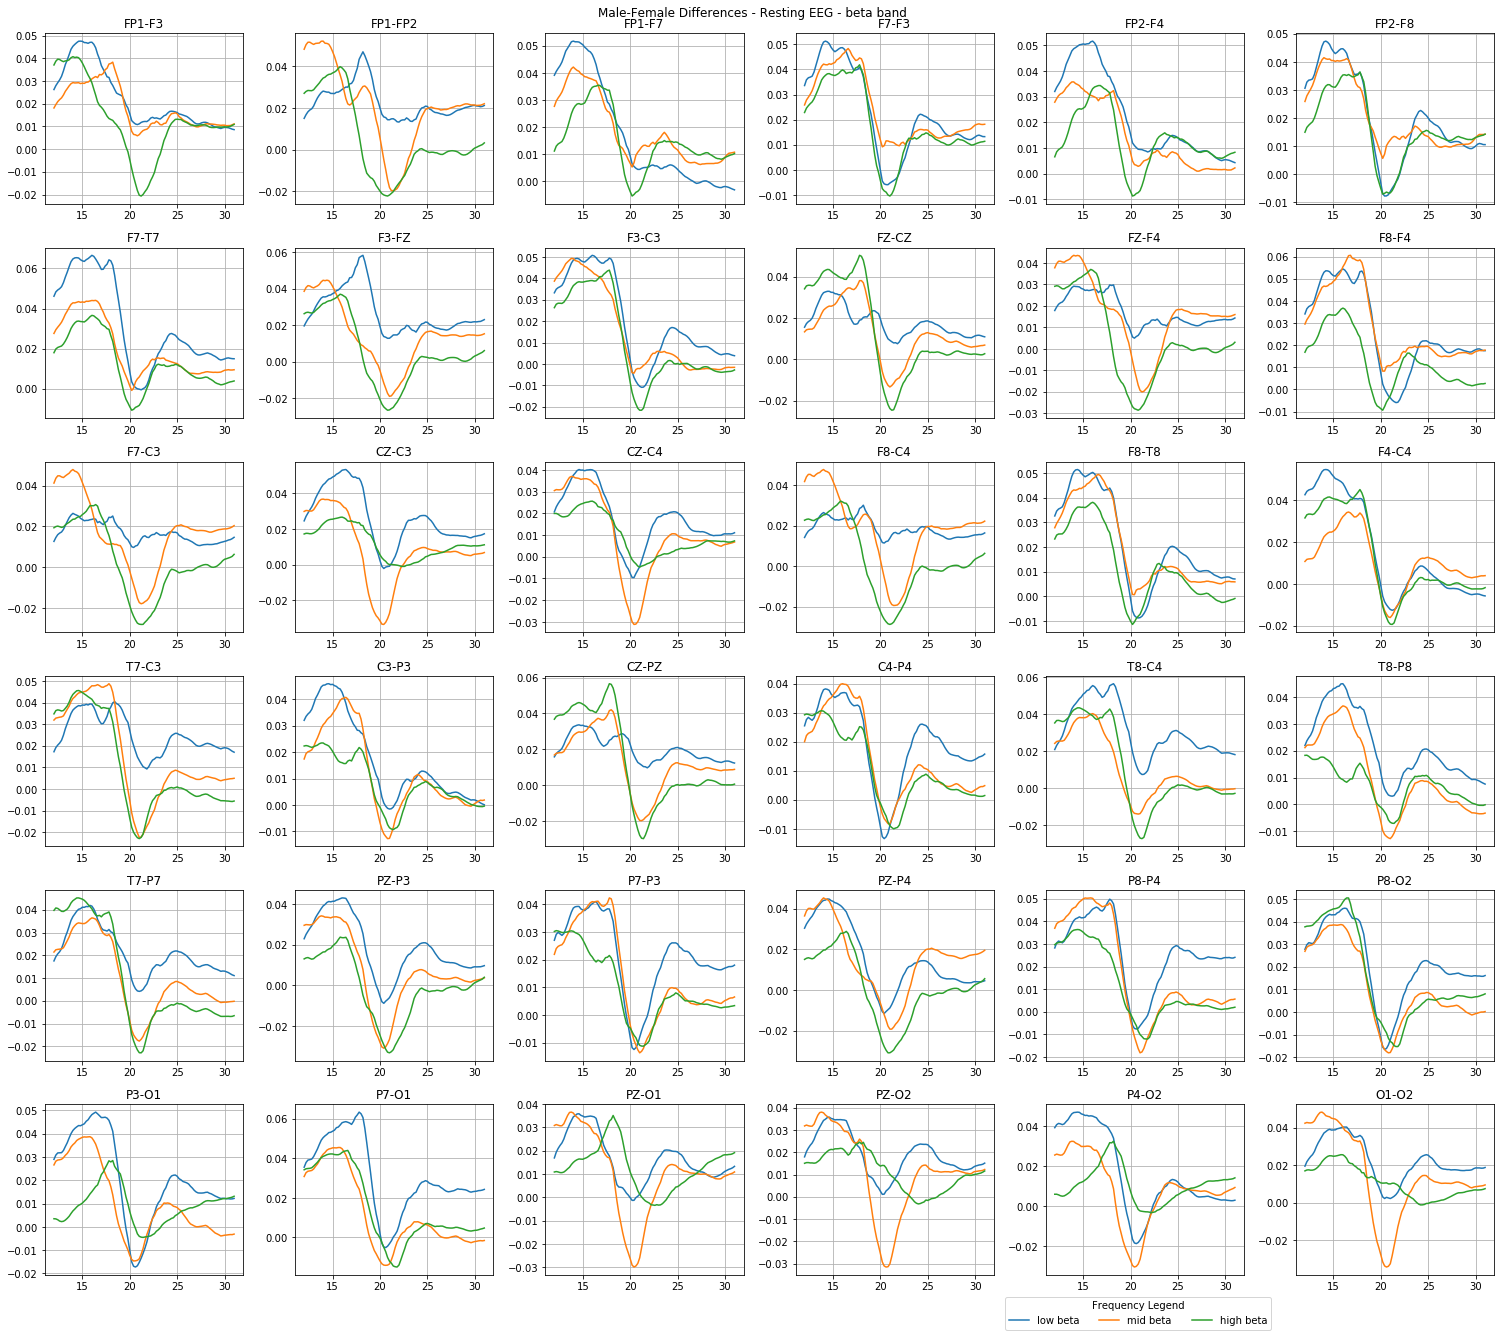

In [25]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(21,18)) #figsize=(18,15)


with PdfPages('test_new_beta.pdf') as pdf:
    for idx, ax in enumerate(axes.flatten()):

        #ax.set_xlim(11.5,31.5)
        #ax.set_ylim(0.067, -0.034)
        

        ax.grid()
        #ax.plot(xaxis_arr, low_theta_new_arr[idx][2], label='low theta')
        #ax.plot(xaxis_arr, high_theta_new_arr[idx][2], label='high theta')
        #ax.plot(xaxis_arr, low_alpha_new_arr[idx][2], label='low alpha')
        #ax.plot(xaxis_arr, high_alpha_new_arr[idx][2], label='high alpha')
        ax.plot(xaxis_arr, low_beta_new_arr[idx][2], label='low beta')
        ax.plot(xaxis_arr, mid_beta_new_arr[idx][2], label='mid beta')
        ax.plot(xaxis_arr, high_beta_new_arr[idx][2], label='high beta')


        #ax.invert_yaxis()  # invert works
        fig.tight_layout() # automatically adjusts spacing b/t plots 


        #fig.subplots_adjust(hspace=.5)  # horozontial spacing b/t plots 
        #fig.subplots_adjust(wspace=.5)  # vertical spacing b/t plots 
        #ax.set_position([0.1,0.1,0.5,0.8])
        #ax.get_position()
        #plt.gcf().get_axes()[idx].set_xlim(11.5,31.5)
        #plt.gcf().get_axes()[idx].set_ylim(0.08, -0.04)



        fig.suptitle('Male-Female Differences - Resting EEG - beta band', y=1)


        ax.title.set_text(new_order[idx])

    handles, labels = ax.get_legend_handles_labels()
    #lgd = ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(1.04, 0))
    #lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1))
    lgd = ax.legend(handles, labels, loc=0, bbox_to_anchor=(-0.0999,-0.0999), ncol=7, title='Frequency Legend')
    #lgd = ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    pdf.savefig(bbox_inches='tight')

## barplots

#### given an array index that corresponds to a specific frequency...  "slices" array of only those values then subtracts the max from min value within that array & returns it

In [9]:
def get_maxmin_in_15_25(arr, frequency_int):
    
    # extract ages 15 - 25 from last dimension of array 
    arr_lst = []
    for i in range(36):
        cut = arr[frequency_int][i][2][15:65]
        arr_lst.append(cut)
        
    # remove list from array     
    ages_arr = np.vstack(arr_lst)
    
    # subtract max from min for each channel for a give frequency
    frequency_range = []
    for i in range(36):
        maxx = np.max(ages_arr[i])
        minn = np.min(ages_arr[i])
        rangee = maxx - minn
        frequency_range.append(rangee)
    return frequency_range

In [10]:
low_theta_range = get_maxmin_in_15_25(arr,0)
high_theta_range = get_maxmin_in_15_25(arr,1)
low_alpha_range = get_maxmin_in_15_25(arr,2)
high_alpha_range = get_maxmin_in_15_25(arr,3)
low_beta_range = get_maxmin_in_15_25(arr,4)
mid_beta_range = get_maxmin_in_15_25(arr,5)
high_beta_range = get_maxmin_in_15_25(arr,6)

#### given the output of get_maxmin_in_15_25() function, creates a SINGLE barplot

In [11]:
def plot_bar(freq_range_lst, title, chan_lst):
    
    nums = [i for i in range(36)]
    
    fig = plt.figure(figsize=(10,7))
    
    plt.bar(nums,freq_range_lst, align='center', alpha=0.5)
    plt.xticks(nums, chan_lst, rotation=45)
    plt.title(title + ' range 15-25')
    plt.axis('tight')
    plt.show()

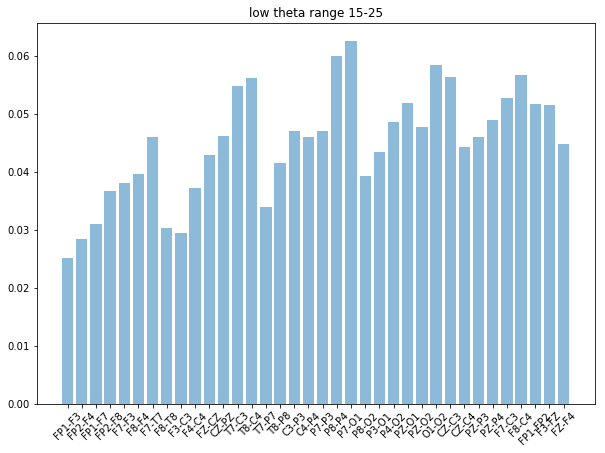

In [11]:
plot_bar(low_theta_range, 'low theta',chans)
#plot_bar(high_theta_range, 'high theta',chans)
#plot_bar(low_alpha_range, 'low alpha',chans)
#plot_bar(high_alpha_range, 'high alpha',chans)
#plot_bar(low_beta_range, 'low beta',chans)
#plot_bar(mid_beta_range, 'mid beta',chans)
#plot_bar(high_beta_range, 'high beta',chans)

#### this is the subplot version of plot_bar() function

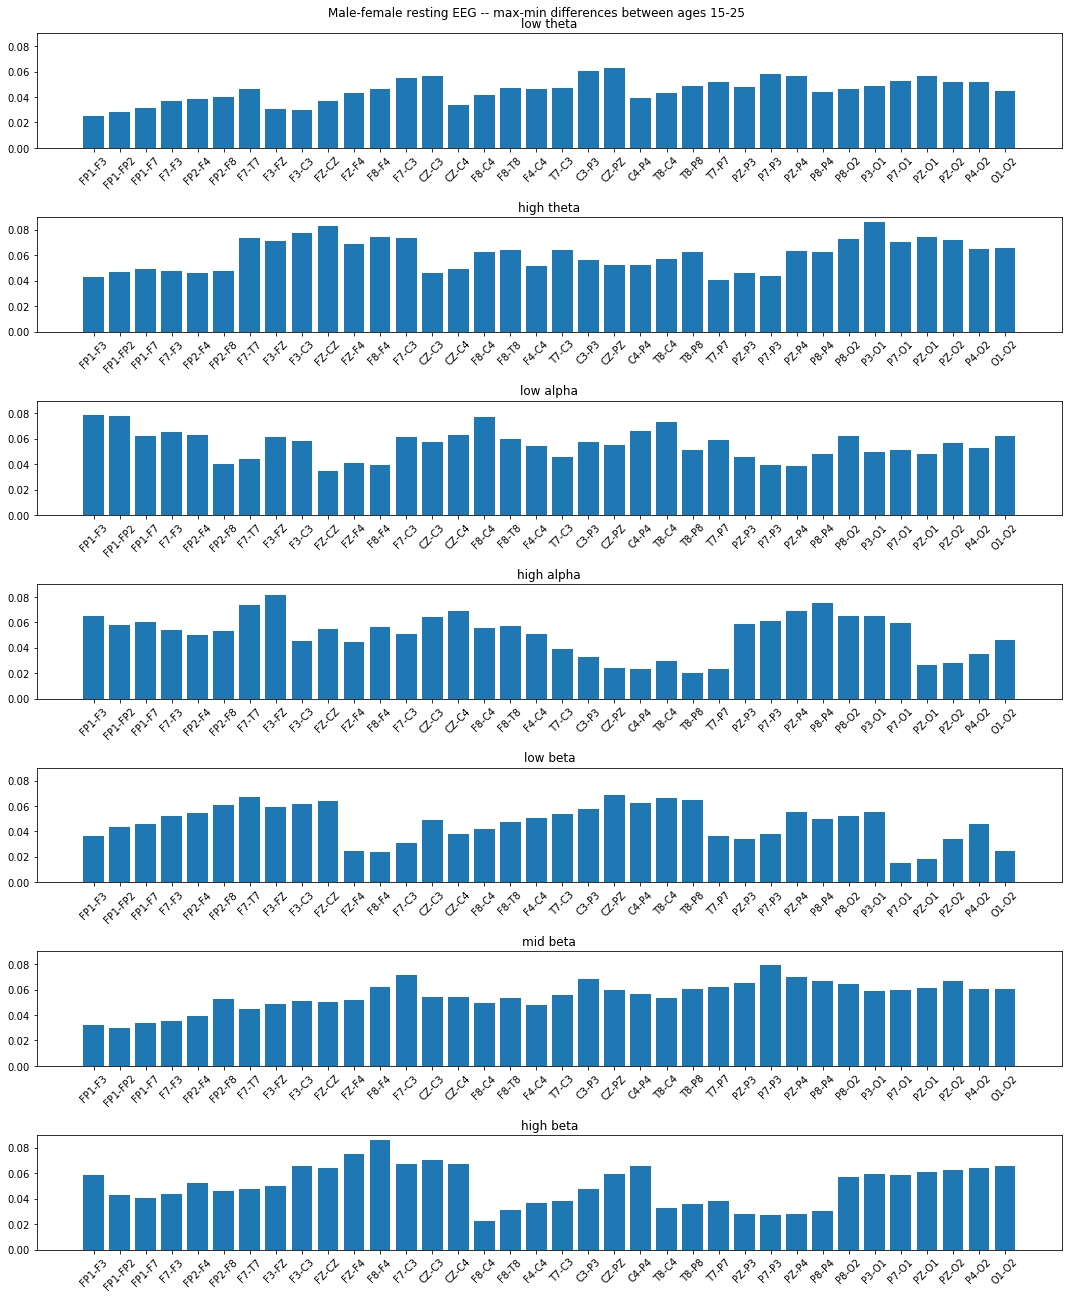

In [18]:
nums = [i for i in range(36)]

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15,18)) #figsize=(18,15)
fig.subplots_adjust(hspace=1.0)
fig.suptitle('Male-female resting EEG -- max-min differences between ages 15-25', y=1)

r1 = axes[0].bar(nums, low_theta_range, align='center')
axes[0].set_title('low theta')

r2 = axes[1].bar(nums, high_theta_range, align='center')
axes[1].set_title('high theta')

r3 = axes[2].bar(nums, low_alpha_range, align='center')
axes[2].set_title('low alpha')

r4 = axes[3].bar(nums, high_alpha_range, align='center')
axes[3].set_title('high alpha')

r5 = axes[4].bar(nums, low_beta_range, align='center')
axes[4].set_title('low beta')

r6 = axes[5].bar(nums, mid_beta_range, align='center')
axes[5].set_title('mid beta')

r7 = axes[6].bar(nums, high_beta_range, align='center')
axes[6].set_title('high beta')


for ax in axes:
    ax.set_xticks(nums)
    #ax.grid('on')
    ax.set_xticklabels(new_order, rotation=45)
    ax.axis('tight')
    ax.set_ylim(0.00, 0.09)
fig.tight_layout()
fig.savefig('barplots.pdf')